# 聚类 

## 1 K-Means聚类算法

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
#############K-means-鸢尾花聚类############
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#from sklearn import datasets
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:-2] ##表示我们只取特征空间中的后两个维度

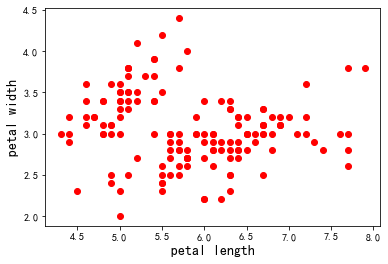

In [ ]:
#绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c = "red", marker='o')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

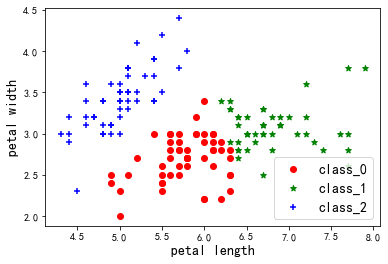

In [ ]:
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签
#绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='class_0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='class_1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='class_2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [5]:
estimator.cluster_centers_,estimator.inertia_

(array([[5.006     , 3.428     ],
        [6.81276596, 3.07446809],
        [5.77358491, 2.69245283]]),
 37.05070212765957)


## 2 DBSCAN聚类算法
DBSCAN(Density-Based Spatial Clustering of Applications with Noise)是一个比较有代表性的基于密度的聚类算法。

与划分和层次聚类方法不同，它将簇定义为密度相连的点的最大集合，能够把具有足够高密度的区域划分为簇，并可在噪声的空间数据库中发现任意形状的聚类。 

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

###  2.1  创建样本数据   

以[1, 1], [-1, -1], [1, -1]为质心生成数据。

In [7]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

In [8]:
#标准化数据
X = StandardScaler().fit_transform(X)

In [9]:
###  2.2 DBSCAN算法

在DBSCAN使用两个超参数：

扫描半径 (eps)和最小包含点数(minPts)来获得簇的数量，而不是猜测簇的数目。
- (1)扫描半径 (eps) : 
用于定位点/检查任何点附近密度的距离度量，即扫描半径。
- (2)最小包含点数(minPts) ：
聚集在一起的最小点数(阈值)，该区域被认为是稠密的。

我们定义一个`plot_dbscan(MyEps, MiniSample)`函数，`MyEps`代表`eps`，`MiniSample`代表`minPts`。

In [10]:
def plot_dbscan(MyEps, MiniSample):
    db = DBSCAN(eps=MyEps, min_samples=MiniSample).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # 标签中的簇数，忽略噪声点（如果存在）。
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("估计的簇的数量: %d" % n_clusters_)
    print("估计的噪声点数量: %d" % n_noise_)
    print("同一性(Homogeneity): %0.4f" %
          metrics.homogeneity_score(labels_true, labels))
    print("完整性(Completeness): %0.4f" %
          metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("ARI(Adjusted Rand Index): %0.4f" %
          metrics.adjusted_rand_score(labels_true, labels))
    print("AMI(Adjusted Mutual Information): %0.4f" %
          metrics.adjusted_mutual_info_score(labels_true, labels))
    print("轮廓系数(Silhouette Coefficient): %0.4f" %
          metrics.silhouette_score(X, labels))

    # #############################################################################
    # 画出结果

    # 黑色点代表噪声点
    unique_labels = set(labels)
    colors = [
        plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
    ]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 1, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("簇的数量为: %d" % n_clusters_, fontsize=18)
    plt.show()

估计的簇的数量: 3
估计的噪声点数量: 18
同一性(Homogeneity): 0.9530
完整性(Completeness): 0.8832
V-measure: 0.917
ARI(Adjusted Rand Index): 0.9517
AMI(Adjusted Mutual Information): 0.9165
轮廓系数(Silhouette Coefficient): 0.6255


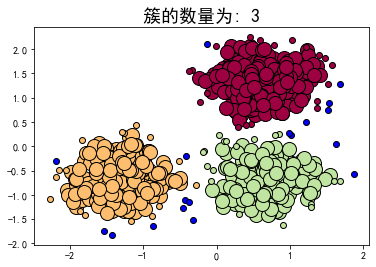

In [11]:
plot_dbscan(0.3, 10)

可以看到，当扫描半径 (eps)为0.3，同时最小包含点数(minPts)为10的时候，评价指标最高。

### 2.3  DBSCAN聚类Moon数据集

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=2023)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

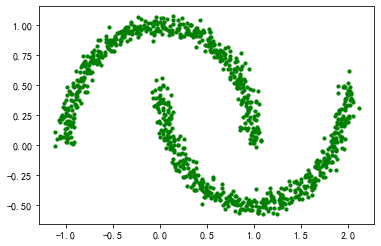

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = "g", marker='o',s=10)

In [14]:
dbscan.labels_[:10]

array([0, 0, 1, 1, 2, 3, 3, 1, 3, 1], dtype=int64)

In [15]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 11], dtype=int64)

In [16]:
dbscan.components_.shape

(812, 2)

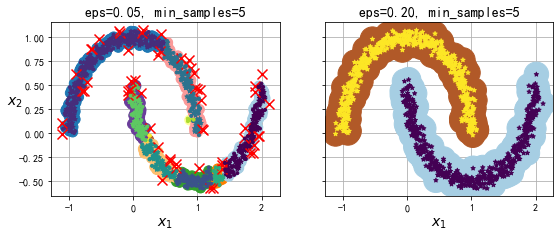

In [17]:

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

